In [52]:
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [44]:
from pandas import Series, DataFrame
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
data = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
data.head()
print "Number of Rows:",data.shape[0] 
print "Number of Columns:",data.shape[1]

Number of Rows: 239677
Number of Columns: 29


In [45]:
#Date parsing
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['monthday'] = data['date'].dt.day
data['weekday'] = data['date'].dt.weekday
data.head()
data.shape[1]

33

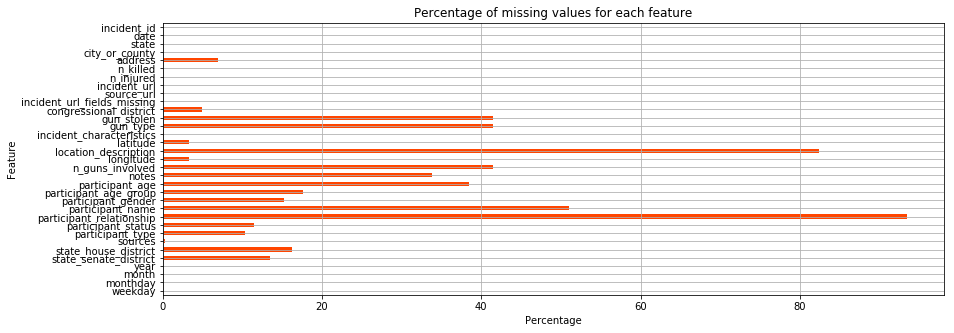

In [46]:
#Missing values
data.isna().mean().mul(100).iloc[::-1].plot(kind='barh', figsize=(14,5), grid=True, title='Percentage of missing values for each feature', color='#ff4500')
plt.xlabel('Percentage')
plt.ylabel('Feature')
plt.show()

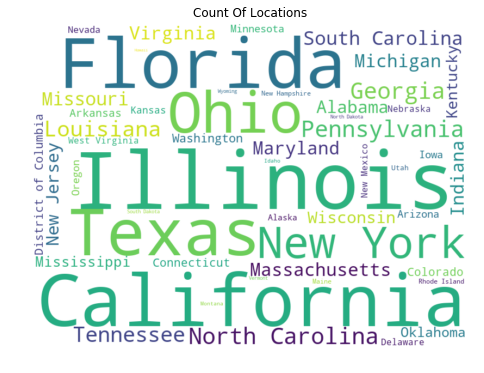

In [47]:
frequencies = data['state'].value_counts().to_dict()

wordcloud = WordCloud(height=600, width=800, background_color='white')
wordcloud.generate_from_frequencies(frequencies=frequencies)
plt.figure(figsize=(14,6))
plt.title('Count Of Locations')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
data['casualties'] = data['n_injured'] + data['n_killed']
data['text'] = (data['year']).astype(str) +'<br>' + data['city_or_county'] + '<br> n_killed ' + (data['n_killed']).astype(str) + '<br> n_injured '+ (data['n_injured']).astype(str)
# Get the mass shooting incidents only
indices = []
df_charac = data.dropna(subset=['incident_characteristics'])
for i in range(df_charac.shape[0]):
    if 'Mass' in df_charac['incident_characteristics'].iloc[i]:
        indices.append(i)
df_mass = df_charac.iloc[indices]


In [53]:
# Plot all mass shooting from 2013-2018
limits = [(0,5),(5,10),(10,30),(30,103)]
colors = ["rgb(255,250,2)","rgb(0,116,217)","rgb(255,7,246)","rgb(255,65,54)"]
cities = []
scale = 10
for i in range(len(limits)):
    df_sub = df_mass[df_mass['casualties'].isin(limits[i])]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        marker = dict(
            alpha=0.5,
            size = df_sub['n_killed']*scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(limits[i][0],limits[i][1]) )
    cities.append(city)

layout = dict(
        title = '2013-2018 US mass gun violence' ,
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict(type='albers usa'),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
iplot( fig, validate=False, filename='d3-bubble-map-populations')